# Background Information

This project seeks to gain insight on the representation of women in film over time. With the increase in popularity of female rights and representation in film recently, notably the “#MeToo” movement beginning in 2016, this project seeks to examine changes in patterns among movie audiences and creators, specifically before after the rise of “#MeToo”.
This project was inspired by “The Dollar-And-Cents Case Against Hollywood’s Exclusion of Women” written by Walt Hickey, which examines 1,615 films released between 1990 and 2013 and “examines the relationship between the prominence of women in a film and that film’s budget and gross profits” (Hickey). The article uses the “Bechdel Test” to judge the gender equity of the film. The film “passes” the test if it fulfills 3 conditions: the movie stars at least two women, these two women must talk to each other and the conversation must be about something other than a man. We will be extending the findings of this article to the years after 2013 to today’s releases, finding if the #MeToo movement has indeed made an impact of gender equity in film.

# The Data & Variables

The data used in this project comes from two sources: BechdelTest.com and The-Numbers.com BechdelTest.com is an online forum operated by moviegoers who analyze whether or not movies entered pass the Bechdel Test. The site contains about 5000 films dating from the 1880s to newly released films, we selected movies from 2013, 2016, and 2019. To locate financial information on these films, we used The-Numbers.com - a leading website that contains box office and budget information for films. The variables used in this data set include the film title, the year it was released, a binary value of “pass/fail” indicating whether or not the film passed the test, the film’s budget, domestic gross, and international gross. Domestic gross is the earnings for the film in the United States and Canada, international gross is the earnings for the film in all other countries. We added variables for budget, domestic gross and international gross to adjust for inflation in 2019. The inflation rates were obtained from www.usinflationcalculator.com/. We also added a variable for return value, which adds domestic and international gross profit, subtracting budget. The data set of movies from 2013 was created by the writer of the Dollars-And-Cents article, while the data from 2016 and 2019 were collected by the team members of this project. Note that the films included in the data set were only movies that were on both BechdelTest.com and The-Numbers.com.

# Exploratory Analysis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import svm
import seaborn as sns

In [75]:
#2013 Data Cleaning
bechdel2013 = pd.read_csv("bechdel.csv", index_col = 0)
bechdel2013 = bechdel2013.drop(['imdb', 'test', 'clean_test', 'code', 
                'period_code', 'decade_code'], axis=1) # drop the unused columns
nullobject = pd.isnull(bechdel2013)
nullobject_i = np.where(nullobject)
bechdel2013.iloc[nullobject_i] = 0 
bechdel2013['budget_2019'] = 1.1 * bechdel2013.budget_2013 
bechdel2013['domgross_2019'] = 1.1 * bechdel2013.domgross_2013
bechdel2013['intgross_2019'] = 1.1 * bechdel2013.intgross_2013
bechdel2013['return'] = bechdel2013.intgross_2019 + bechdel2013.domgross_2019 - bechdel2013.budget_2019
bechdel2013 = bechdel2013[bechdel2013.year == 2013]
bechdel2013 = bechdel2013.drop(['budget', 'domgross', 'intgross', 'budget_2013', 'domgross_2013', 'intgross_2013'], axis=1) # drop the unused columns
bechdel2013 = bechdel2013.set_index('title')
return2013 = pd.DataFrame(bechdel2013.loc[:,['binary', 'return']])
return2013 = return2013.groupby(['binary']).sum()
bechdel = pd.read_csv("2019 bechdel.csv", index_col = 0, dtype = {'domgross':np.float64, 'year':np.int32})
sep = bechdel[['domgross', 'intgross', 'budget']]
ind = sep.dropna(how = 'all').index
bechdel = bechdel.loc[ind,]
bechdel2019 = bechdel[bechdel.year == 2019]
bechdel2016 = bechdel[bechdel.year == 2016]
#2016 Data
bechdel2016.loc[:,'budget_2019'] = 1.07 * bechdel2016.loc[:,'budget']
bechdel2016.loc[:,'domgross_2019'] = 1.07 * bechdel2016.domgross
bechdel2016.loc[:,'intgross_2019'] = 1.07 * bechdel2016.loc[:,'intgross']
bechdel2016.loc[:,'return'] = bechdel2016.loc[:,'intgross_2019'] + bechdel2016.loc[:,'domgross_2019'] - bechdel2016.loc[:,'budget_2019']
bechdel2016 = bechdel2016.drop(['domgross', 'intgross', 'budget'], axis = 1)
#2019 Data
bechdel2019.loc[:,'budget_2019'] = bechdel2019.budget
bechdel2019.loc[:,'domgross_2019'] = bechdel2019.domgross
bechdel2019.loc[:,'intgross_2019'] = bechdel2019.intgross
bechdel2019['return'] = bechdel2019.intgross_2019 + bechdel2019.domgross_2019 - bechdel2019.budget_2019
bechdel2019 = bechdel2019.drop(['domgross', 'intgross', 'budget'], axis = 1)
total = pd.concat([bechdel2013, bechdel2016, bechdel2019], sort = False)
total['gross'] = total.intgross_2019 + total.domgross_2019

/Users/rachelrusch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Trend Analysis
Prior to 2013, the proportion of movies that failed flatlined after 2011, noted in "The Dollars-And-Cents" Case.

Text(0.5, 1.0, 'Pass vs. Fail by Year')

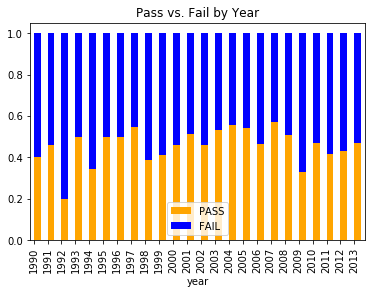

In [137]:
bechdel = pd.read_csv("bechdel.csv", index_col = 0)
bech_narm = bechdel.dropna(how = 'any')
bech_pass = bech_narm.loc[bech_narm['binary'] == "PASS"].groupby('year').title.nunique()
bech_fail = bech_narm.loc[bech_narm['binary'] == "FAIL"].groupby('year').title.nunique()
count_by_year = pd.concat([bech_pass, bech_fail], axis = 1, sort = False)
count_by_year = count_by_year.fillna(value = 0)
count_by_year.columns = ['pass','fail']
count_by_year = count_by_year.assign(PASS = lambda x : x['pass']/(x['pass']+x['fail']))
count_by_year = count_by_year.assign(FAIL = lambda x : x['fail']/(x['pass']+x['fail']))
count_by_year = count_by_year.drop(columns = ['pass','fail'])
count_by_year[['PASS', 'FAIL']].plot(kind = 'bar', stacked = True, position = 0, color = ('orange', 'blue'))
plt.title('Pass vs. Fail by Year')

In 2013, there was about an equal amount of movies that passed and failed. In the Dollars-And-Cents case, Hickey notes than the proportion of movies that passed had “flatlined” from 2000-2013. After 2013, we see the proportion of pass to fail begin to grow. The amount of movies that pass now exceeds the amount of movies that fail the test. 

Text(0.5, 1.0, 'Pass vs. Fail by Year')

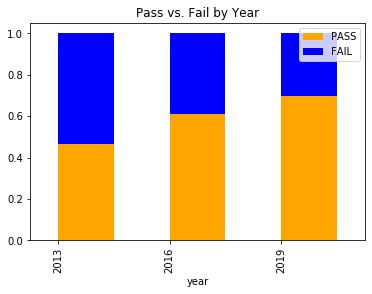

In [77]:
w_19 = bechdel2019.loc[:,('year', 'binary')]
w_16 = bechdel2016.loc[:,('year', 'binary')]
w_13 = bechdel2013.loc[:,('year', 'binary')]
w = pd.concat([w_19, w_16, w_13])
w = w.reset_index().rename(columns = {'index': 'film_name'})
w_pass = w.loc[w['binary'] == "PASS"].groupby('year').film_name.nunique() 
w_fail = w.loc[w['binary'] == "FAIL"].groupby('year').film_name.nunique() 
count_by_year=pd.concat([w_pass, w_fail], axis=1, sort =False) 
#count_by_year=count_by_year.fi1lna(value = 0) 
count_by_year.columns= ['pass','fail']
count_by_year=count_by_year.assign(PASS=lambda x:x ['pass' ]/(x['pass']+x['fail'])) 
count_by_year=count_by_year.assign(FAIL=lambda x:x ['fail' ]/(x['pass']+x['fail'])) 
count_by_year=count_by_year.drop(columns= ['pass', 'fail']) 
count_by_year [[ 'PASS','FAIL']].plot (kind='bar', stacked=True, position=0, color=('orange', 'blue'))
plt.title('Pass vs. Fail by Year')

In [26]:
count_by_year

,PASS,FAIL
year,,
2013,0.464646,0.535354
2016,0.612648,0.387352
2019,0.695652,0.304348


## Average Gross Earnings by Year
After 2013, the data shows a higher increase in gross earnings for movies that pass the test versus movies that fail the test. In 2013, the average gross earnings for movies that passed the test fell short of those that failed by about 8 million dollars. In 2016, the average gross earnings for movies that passed the test surpassed the earnings of those that failed by 10 million dollars. In 2019, gross earnings for movies that passed surpassed movies that failed by 200 million dollars. This may indicate that audiences are now more willing to pay more for movies that pass the test.

In [18]:
a = total[['year', 'binary', 'gross']].groupby(['year','binary']).mean().unstack()
a

gross              
binary          FAIL          PASS
year                              
2013    3.452977e+08  3.371010e+08
2016    1.144391e+08  1.318532e+08
2019    1.981420e+08  4.116373e+08

Text(0.5, 1.0, 'Gross Earnings Over Time')

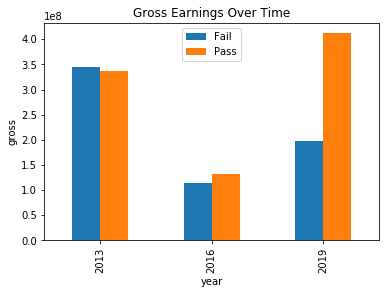

In [19]:
a.plot(kind = 'bar')
plt.legend(['Fail', 'Pass'], loc='upper center')
plt.ylabel('gross')
plt.title('Gross Earnings Over Time')

In 2013, the average gross earnings for movies that passed the test fell short of those that failed by about 8 million dollars. In 2016, the average gross earnings for movies that passed the test surpassed the earnings of those that failed by 10 million dollars. In 2019, gross earnings for movies that passed surpassed movies that failed by 200 million dollars. This may indicate that audiences are now more willing to pay more for movies that pass the test.

## Average Budget by Year
In the Dollars-and-Cents case, they presented evidence to show that the median budget suggested that Hollywood at the time put more money behind “male-only” films than films that featured women. This proved to be true in 2013, as the average budget for movies that passed the test was 5 million dollars lower than those that failed the test. But based on the data from 2016 and 2019, we see a shift in this behavior, as the average budget for films that pass the test surpass those that failed by 5 million dollars, indicating that Hollywood is starting to put more money toward films with equal representation in the years passing the films. The passing year in 2019 is still higher than both other years.

In [20]:
budget_total=pd.concat([bechdel2013, bechdel2016 ,bechdel2019], sort = False)
b = budget_total.groupby(['year','binary']).budget_2019.sum()
b2 = b.unstack().fillna(value = 0)
b2

binary,FAIL,PASS
year,,
2013,5.028870e+09,2.822600e+09
2016,3.492121e+09,5.140866e+09
2019,5.110000e+08,1.775800e+09


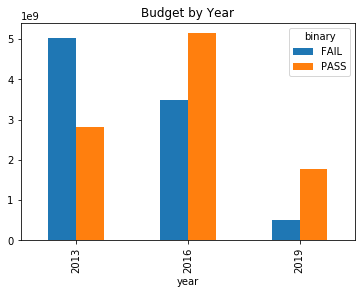

In [21]:
b2.plot(kind = "bar",title='Budget by Year')

## Average Return by Year
In Hickey’s article, they challenge the assumption that movies featuring more women see a lower return on investment. We looked at the average return value for movies in 2013, 2016 and 2019. In 2013, we see a lower return for movies that pass the test than those that fail. But in both 2016 and 2019 the return on investment for movies that fail surpasses the return for movies that fail by about 5 million dollars. This is yet another indicator that audiences are willing to pay more for movies with higher female representation.

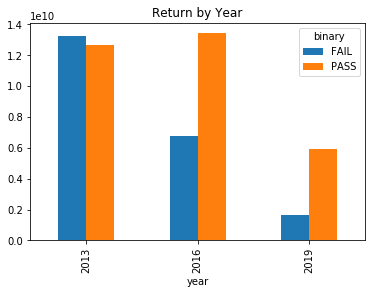

In [11]:
bechdel2019['RETURN'] = bechdel2019.intgross_2019 + bechdel2019.domgross_2019 - bechdel2019.budget_2019
bechdel2016['RETURN'] = bechdel2016.intgross_2019 + bechdel2016.domgross_2019 - bechdel2016.budget_2019
bechdel2013['RETURN'] = bechdel2013.intgross_2019 + bechdel2013.domgross_2019 - bechdel2013.budget_2019
bechdel_return=pd.concat([bechdel2013, bechdel2016, bechdel2019], sort = False)
c = bechdel_return.groupby(['year','binary']).RETURN.sum()
c2 = c.unstack().fillna(value = 0)
c2.plot(kind = "bar",title='Return by Year')

## Marvel Movie Franchise¶
While we know that the pass vs. fail rate of movies passing the Bechdel test are increasing over time, we wanted to ask if movies that were truly leading the movie industry of the time are following the same trend of gender equality. And what better depiction of a leader in the movie industry as the Marvel Cinematic Universe (MCU), the highest-grossing movie franchise of all time (Mentalfloss.com). The Marvel franchise has released 23 movies, releasing 11 movies just in 2016-2019 alone. We performed the same calculations as above on the 22 released movies in the Marvel Cinematic Universe. For this data, we created a data set of all 21 Marvel Movies in the franchise, released between 2008 and 2019.

Text(0.5, 1.0, 'Pass vs. Fail by Year')

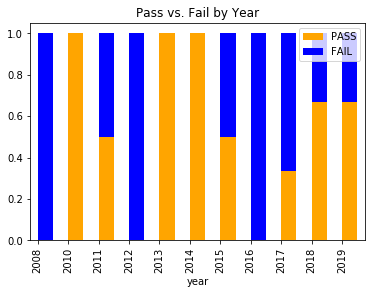

In [28]:
marvel_csv = pd.read_csv("Marvel_Bechdel - Marvel.csv")
marvel_csv.columns = ['film_name', 'binary', 'dom_gross', 'int_gross', 'budget','year']
marvel_pass = marvel_csv.loc[marvel_csv['binary'] == "PASS"].groupby('year').film_name.nunique()
marvel_fail = marvel_csv.loc[marvel_csv['binary'] == "FAIL"].groupby('year').film_name.nunique()
count_by_year = pd.concat([marvel_pass, marvel_fail], axis = 1, sort = False)
count_by_year = count_by_year.fillna(value = 0)
count_by_year.columns = ['pass','fail']
count_by_year = count_by_year.assign(PASS = lambda x : x['pass']/(x['pass']+x['fail']))
count_by_year = count_by_year.assign(FAIL = lambda x : x['fail']/(x['pass']+x['fail']))
count_by_year = count_by_year.drop(columns = ['pass','fail'])
count_by_year[['PASS', 'FAIL']].plot(kind = 'bar', stacked = True, position = 0, color = ('orange', 'blue'))
plt.title('Pass vs. Fail by Year')

Overall, Marvel has had a pass rate of 51%. Before 2017, the pass rate of films was a solid 50%, which rose to 55% post-#MeToo movement. It’s interesting to note that 2016 did not have a single movie that passed the test, but after the #MeToo movement was in full swing, the proportion of movies that passed the test increased consistently.

In [29]:
count_by_year

,PASS,FAIL
year,,
2008,0.000000,1.000000
2010,1.000000,0.000000
2011,0.500000,0.500000
2012,0.000000,1.000000
2013,1.000000,0.000000
2014,1.000000,0.000000
2015,0.500000,0.500000
2016,0.000000,1.000000
2017,0.333333,0.666667


## Budget¶
On average, Marvel has spent about 203 million dollars per film passing the test, while spending about 187 million per film that fails the test.

Text(0.5, 1.0, 'Budget by Year')

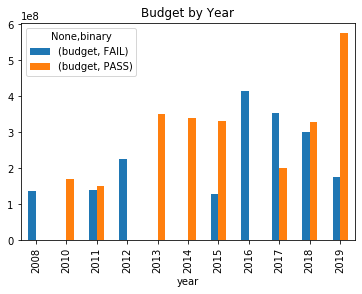

In [30]:
marvel_csv.groupby(['year', 'binary']).budget.sum()
df = pd.DataFrame(marvel_csv.groupby(['year', 'binary']).budget.sum())
df2 = df.unstack().fillna(value = 0)
df2.plot(kind = 'bar')
plt.title("Budget by Year")

In [32]:
marvel_pass = marvel_csv[marvel_csv['binary'] == "PASS"]
marvel_fail = marvel_csv[marvel_csv['binary'] == "FAIL"]
marvel_csv[['binary', 'budget']].groupby(['binary']).mean()

,budget
binary,
FAIL,187750000
PASS,203800000


## Return
The average return value for Marvel movies that pass is about 861 million dollars, while the average for those that fail falls short of those that pass, with an average return of about 753 million.

Text(0.5, 1.0, 'Return by Year')

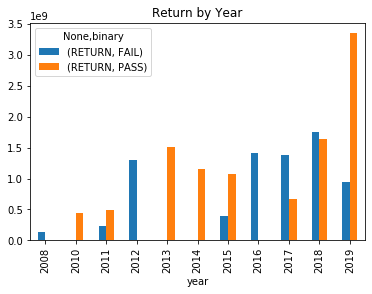

In [34]:
marvel_csv = marvel_csv.assign(RETURN = lambda x: x.int_gross + x.dom_gross - x.budget)
marvel_pass_return = marvel_csv.loc[marvel_csv['binary'] == "PASS"]
marvel_fail_return = marvel_csv.loc[marvel_csv['binary'] == "FAIL"]
marvel_csv.groupby(['year', 'binary']).RETURN.sum()
df = pd.DataFrame(marvel_csv.groupby(['year', 'binary']).RETURN.sum())
df2 = df.unstack().fillna(value = 0)
df2.plot(kind = 'bar')
plt.title("Return by Year")

In [47]:
marvel_csv[['binary', 'RETURN']].groupby(['binary']).mean()

,RETURN
binary,
FAIL,7.533516e+08
PASS,8.610384e+08


# Data Modeling

## Proportion Trend Over Time
We wanted to compare the trend of proportions of moves that pass versus movies that failed over time. We ran a linear regression for pass rate vs. year and fail rate vs. year. We found an increasing trend over time for proportion of passing films, and a negative trend for proportion of films that fail.

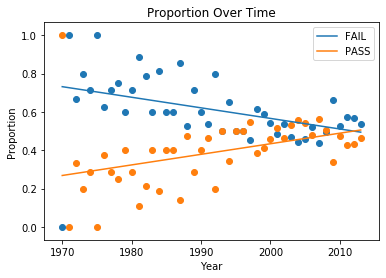

In [45]:
modeldata = pd.read_csv("bechdel.csv", index_col = 0)
modeldata.head
df = pd.DataFrame(modeldata[['year', 'binary']].groupby('year').binary.value_counts().unstack().fillna(0))
total_year = pd.DataFrame(modeldata.year.value_counts())
df[['total']] = total_year
PASS = df.iloc[:,1]/df.iloc[:,2]
FAIL = df.iloc[:,0]/df.iloc[:,2]
FAIL = np.array(FAIL)
PASS = np.array(PASS)
year = np.array(df.index).reshape((-1, 1))
m1 = LinearRegression().fit(year, PASS)
m2 = LinearRegression().fit(year, FAIL)
P_pred = m1.predict(year)
F_pred = m2.predict(year)
plt.scatter(year,FAIL)
plt.scatter(year,PASS)
plt.plot(year,F_pred, label = 'FAIL')
plt.plot(year,P_pred, label = 'PASS')
plt.title('Proportion Over Time')
plt.legend(loc = 'upper right')
plt.xlabel('Year')
plt.ylabel('Proportion')
passprop = m1.predict(np.array(2019).reshape(1,-1))
failprop = m2.predict(np.array(2019).reshape(1,-1))

## Checking Assumptions
There are some holes in our model. We see that for proportions of pass and fail, the normal Q-Q plots show slight tails at each end, so we cannot assume they follow a normal distribution.

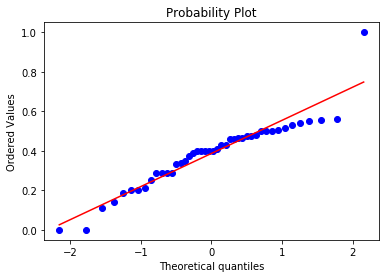

In [48]:
import scipy.stats as stats
stats.probplot(PASS, dist="norm", plot=plt)
plt.show()

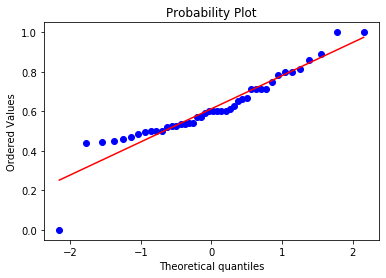

In [49]:
stats.probplot(FAIL, dist="norm", plot=plt)
plt.show()

We initially sought out to produce a model that would predict return trend over time, but due to the nature of our data, the linear model would not be an approriate fit for our data.

Text(0.5, 1.0, 'Return Trend Over Time')

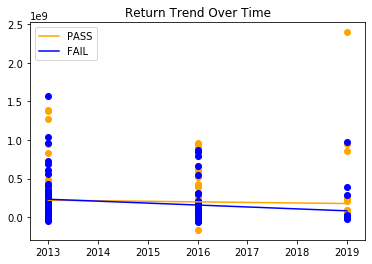

In [36]:
total_narm = total.dropna(how = 'any')
bech_pass = total_narm[total_narm['binary'] == "PASS"]
bech_fail = total_narm[total_narm['binary'] == "FAIL"]
pass_x = bech_pass.year.values.reshape(-1, 1)  # values converts it into a numpy array
pass_y = bech_pass['return'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
fail_x = bech_fail.year.values.reshape(-1, 1)  # values converts it into a numpy array
fail_y = bech_fail['return'].values.reshape(-1, 1) 
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(pass_x, pass_y)  # perform linear regression
pass_y_pred = linear_regressor.predict(pass_x)  # make predictions
linear_regressor.fit(fail_x, fail_y)
fail_y_pred = linear_regressor.predict(fail_x)
plt.scatter(pass_x, pass_y, color = "orange")
plt.scatter(fail_x, fail_y, color = "blue")
plt.plot(pass_x, pass_y_pred, color='orange', label = "PASS")
plt.plot(fail_x, fail_y_pred, color="blue", label = "FAIL")
plt.legend()
plt.title("Return Trend Over Time")

However, our Marvel data set proved to be a good subset of the data to perform a linear regression to examine trends in values for pass vs. fail. 

Text(0.5, 1.0, 'Return Trend Over Time')

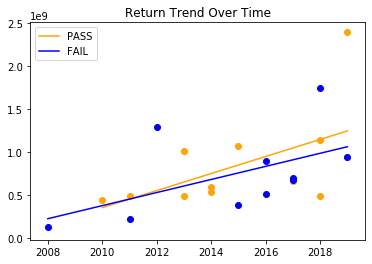

In [37]:
pass_x = marvel_pass_return.year.values.reshape(-1, 1)  # values converts it into a numpy array
pass_y = marvel_pass_return.RETURN.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
fail_x = marvel_fail_return.year.values.reshape(-1, 1)
fail_y = marvel_fail_return.RETURN.values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(pass_x, pass_y)  # perform linear regression
pass_y_pred = linear_regressor.predict(pass_x)  # make predictions
linear_regressor.fit(fail_x, fail_y)
fail_y_pred = linear_regressor.predict(fail_x)
plt.scatter(pass_x, pass_y, color = "orange")
plt.scatter(fail_x, fail_y, color = "blue")
plt.plot(pass_x, pass_y_pred, color='orange', label = "PASS")
plt.plot(fail_x, fail_y_pred, color="blue", label = "FAIL")
plt.legend()
plt.title("Return Trend Over Time")

When comparing trends for passing return value versus fail return values, we see a greater trend for pass movies versus fail.

Text(0.5, 1.0, 'Budget Trend Over Time')

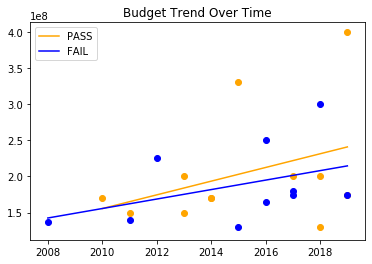

In [38]:
pass_x = marvel_pass.year.values.reshape(-1, 1)  # values converts it into a numpy array
pass_y = marvel_pass.budget.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
fail_x = marvel_fail.year.values.reshape(-1, 1)
fail_y = marvel_fail.budget.values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(pass_x, pass_y)  # perform linear regression
pass_y_pred = linear_regressor.predict(pass_x)  # make predictions
linear_regressor.fit(fail_x, fail_y)
fail_y_pred = linear_regressor.predict(fail_x)
plt.scatter(pass_x, pass_y, color = "orange")
plt.scatter(fail_x, fail_y, color = "blue")
plt.plot(pass_x, pass_y_pred, color='orange', label = "PASS")
plt.plot(fail_x, fail_y_pred, color="blue", label = "FAIL")
plt.legend()
plt.title("Budget Trend Over Time")

When comparing trends for passing return value versus fail return values, we also see a greater trend for pass movies versus fail.

## Checking Assumptions
However, we must note that the sample size of the Marvel dataset is small. We also note that with the growing trend of Marvel movies, the graph seems to be exponential rather than linear, although the normal Q-Q plot for both graphs do not stray too far from the line. We chose the linear model to display the increasing trend of budget and return over time, but an exponential model may be more appropriate.

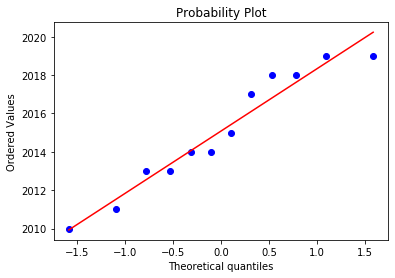

In [139]:
stats.probplot(np.array(marvel_pass.year.values), dist="norm", plot=plt)
plt.show()

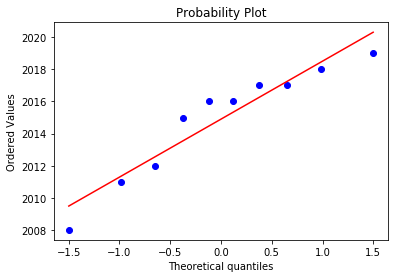

In [140]:
stats.probplot(np.array(marvel_fail.year.values), dist="norm", plot=plt)
plt.show()

# Conclusion
Based on our findings, the data shows an improvement on representation of women in film after The Dollars-and-Cents case in 2013. The amount of films passing the bechdel test continue to increase. Gross earnings, budget, and return values for films passing the test now surpass that of films that fail the test. This could indicate that Hollywood and its audiences are spending more on films with more female representation. 